In [1]:
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient
from utils import *

uint16 (1, 128, 128)
uint16 (1, 128, 128)
<class 'torch.Tensor'>
torch.Size([1, 128, 128])


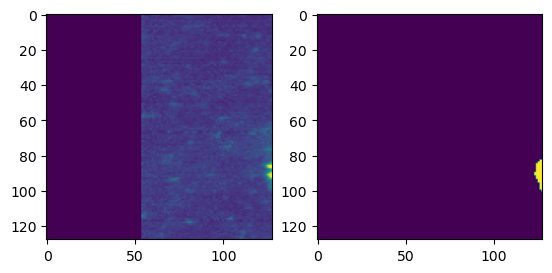

In [2]:
train_filepath = "train"
train_dataset = AngioDataset(train_filepath,patch_size=[1, 128, 128])

train_dataset_raw = train_dataset[0][0]
train_dataset_mask = train_dataset[0][1]

print(type(train_dataset_raw))
print(train_dataset_raw.shape)

fig, ax = plt.subplots(1,2)

ax[0].imshow(train_dataset_raw[0,:,:])
ax[1].imshow(train_dataset_mask[0,:,:])


In [3]:
val_filepath = "val"
val_dataset = AngioDataset(val_filepath,patch_size=[1, 128, 128])
print(len(val_dataset))



3


In [4]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10)


In [5]:
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

In [11]:
final_activation="Sigmoid"
model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation).to(device)
loss_function = nn.MSELoss()
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_epochs = 10
dice = DiceCoefficient()
logger = SummaryWriter("runs")
log_interval=1


In [7]:
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device)

uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)
Train Epoch: 0 [0/3 (0%)]	Loss: 0.240713
uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)

Validate: Average loss: 847.9052, Average Metric: -57528545280.0000

uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)
Train Epoch: 1 [0/3 (0%)]	Loss: 905.273926
uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)

Validate: Average loss: 50.7694, Average Metric: 0.0468

uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)
Train Epoch: 2 [0/3 (0%)]	Loss: 54.064007
uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)

Validate: Average loss: 1.8056, Average Metric: 0.0499

uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)
Train Epoch: 3 [0/3 (0%)]	Loss: 1.923056
uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)

Validate: Average loss: 0.3305, Average Metric: 0.0541

uint16 (1, 128, 128)
uint16 (1, 128, 128)
uint16 (1, 128, 128)
Train Epoch: 4 [0/3 (0%)

uint16 (1, 128, 128)
MSE loss: 0.040000234
Image size is {torch.Size([128, 128])}


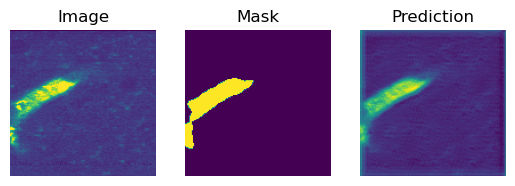

In [8]:
show_random_dataset_image_with_prediction(train_dataset, model, device)